# K-Means clustering over Weather Stations Data



In this study, we will use the clustering technique K-means to explore and test this use over a meteorological data set from weather stations in Brazilian Northeast area. A ilustrative case will be produced, where we will remove information about localization and date from the data and from that we will try to infer a) the optimal number of clusters representing a station and b) the main characteristics of each point from climatological view point.

The K-means is the most intuitive and widespread technique for cluster data. We will apply the Elbow method to select the optimal number os clusters and the shadow technique to validate the structure found.

## Adjusting data

We first load the data set into python

In [6]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
import numpy as np

path = '/home/desplein/proj/data_bases/'
ini = '1996-01-01'
end = '2016-11-30'

n_samples = 1500
random_state = 170

The random_state variable here tells to KMeans package to seed the pseudo-random numbers generation. Your data starts in 1996 to 2016. 

In [7]:
dailyPrecipitation = pd.read_csv(path + 'station_precip.csv', index_col=0, parse_dates=True)
maxTemperature = pd.read_csv(path + 'station_tmax.csv', index_col=0, parse_dates=True)

# Resample the daily temperature values to yearly maximuns 
maxTemperature = maxTemperature.resample('A').max()[ini:end]
# Resample the daily temperature values to yearly accumulated
totalPrecip = dailyPrecipitation.resample('A').sum()[ini:end]

# Adjusting data from time series to arrays format
tempPrecip = totalPrecip.stack().reset_index(level=1, drop=True)
tempTemperature = maxTemperature.stack().reset_index(level=1, drop=True)

# adjusting type as array
data = pd.concat([tempTemperature, tempPrecip], axis=1).dropna().as_matrix()

# rescaling data
min_max_scaler = preprocessing.MinMaxScaler()
data_norm = min_max_scaler.fit_transform(data)

Rescaling data here is necessary given the assimetry between temperature and accumulated precipitation units. Then, the normalized data is

In [9]:
data_norm[1:10]

array([[ 0.26315789,  0.15277361],
       [ 0.07894737,  0.66853464],
       [ 0.34210526,  0.44064178],
       [ 0.13157895,  0.39364222],
       [ 0.96052632,  0.17608993],
       [ 0.27631579,  0.10637446],
       [ 0.07894737,  0.51702859],
       [ 0.22368421,  0.23092832],
       [ 0.27631579,  0.34504153]])

## The Elbow method

The Elbow method is a widespread heuristics empolyed to estimate the optimal number of clusters throught a set of k-means computations. It performs k simulations, varing the number of clusters. This optimal value is achieved when, in the step $n$ where $n \in 2 \dots k$, adding the $n+1$ cluster no more improves the percentage of variance explained globally. There is no objective levels for judge when the improvement is enough and the judgement of the shift point is very subjective hard to determine. 

The following code shows 15 iterations when the number of clusters are increased by one and the total explained variance is computed. At end a chart shows the results

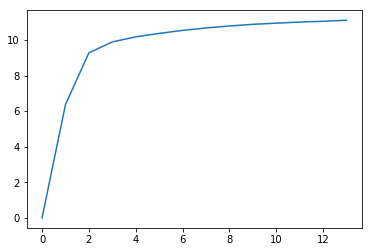

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist

# data set
df = pd.DataFrame({'temperature':data_norm[:,0],'precipitation': data_norm[:,1]})

# number of iterations
n = 15

kMeansVar = [KMeans(n_clusters=k).fit(df.values) for k in range(1, n)]
centroids = [X.cluster_centers_ for X in kMeansVar]
k_euclid = [cdist(df.values, cent) for cent in centroids]
dist = [np.min(ke, axis=1) for ke in k_euclid]

# distance squared sum (verifiy this math)
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(df.values)**2)/df.values.shape[0]
bss = tss - wcss
plt.plot(bss)
plt.show()



As often happens, the Elbow method has a not so obvious result. As we can see, the improviment of explained variance starts to decrease at 4 clusters and is almost constant from 6 elements. As expected, 5 clusters looks like the best value for k.

# The K-Means method

Over thes reescaled data set it is possible to apply K-means cluster from sklearn kit. Once we already know that data comes from 5 specific stations it is easy to choose the expected number of clusters. Note that it is not always easy to chose and there are specific techniques for this.

At the end, we use the original data set and not the scaled one to show the results in a more intuitive way.

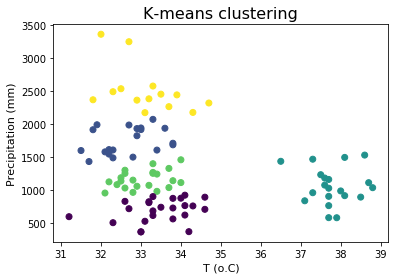

In [4]:
# k means with 5 clusters
yPrediction = KMeans(n_clusters=5, random_state=random_state).fit_predict(data_norm)
yValues = KMeans(n_clusters=5, random_state=random_state).fit(data_norm)

# plotting
plt.scatter(data[:, 0], data[:, 1], c=yPrediction)
plt.title("Temp vs Precip")


#plt.scatter(a, b,  color='red', s=6)
#plt.plot(data['x'], model.predict(), color='black',  linewidth=0.8)
#name = 'Monthly TNx'
tLabelName = 'T (o.C)'
pLabelName = 'Precipitation (mm)'
plt.title("K-means clustering" , fontsize=16)
plt.ylabel(pLabelName, fontsize=11)
plt.xlabel(tLabelName, fontsize=11)
plt.show()


As the last figure shows, 5 clusters were identified.
Now, lets recover the centroids for each cluster (doing the reverse normalization).

In [17]:
centroidsDenorm = min_max_scaler.inverse_transform(yValues.cluster_centers_)
centroidsDenorm

array([[   33.4625    ,   685.675     ],
       [   32.66      ,  1740.18      ],
       [   37.805     ,  1054.895     ],
       [   33.05      ,  1156.74090909],
       [   33.13571429,  2508.04285714]])

Each pair is a centroid coordinate for 5 clusters. Now it is worthwhile take a look in the original labeled data characteristics. Lets compute the mean values for original precipitation and max temperature data

## The Silhouette analysis

Bla

In [18]:
# k means with 5 clusters
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(data)
    label = kmeans.labels_
    sil_coeff = silhouette_score(data, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))


For n_clusters=2, The Silhouette Coefficient is 0.619345628752
For n_clusters=3, The Silhouette Coefficient is 0.540496292824
For n_clusters=4, The Silhouette Coefficient is 0.544911636297
For n_clusters=5, The Silhouette Coefficient is 0.564682033826
For n_clusters=6, The Silhouette Coefficient is 0.587337815869
For n_clusters=7, The Silhouette Coefficient is 0.59795266446
For n_clusters=8, The Silhouette Coefficient is 0.582640537416
For n_clusters=9, The Silhouette Coefficient is 0.565306145999
For n_clusters=10, The Silhouette Coefficient is 0.554970795178


## Conclusions

In [8]:
np.mean(maxTemperature)

BARBALHA     37.805
CAMPINA      33.475
RECIFE       32.910
FORTALEZA    33.455
TRIUNFO      32.525
dtype: float64

In [9]:
np.mean(totalPrecip)

BARBALHA     1054.895
CAMPINA       790.105
RECIFE       2227.805
FORTALEZA    1483.455
TRIUNFO      1089.670
dtype: float64

Clearly the mean results reflects the expected method's outcomes. Each location has exactly the same mean values as its centroids obtained from method because the centroids ARE the means values of each locality. Suposing our data were not labeled, this tecnique would be correct estimating correctly each location mean. By seeing the results from means we can say that yellow points are Recife observation as well are from Triunfo the green ones. The impressive results from grouping Barbalha shows the power of method.